In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

import os
from pathlib import Path

# Read `png` file and put in `numpy` array

## Get file name

In [2]:
image_directory = Path.cwd().joinpath("images")
test_file = list(image_directory.glob("*.png"))[0]
print(test_file)

/Users/nordin/Documents/Projects/notes_to_self/python/images/0red_6water_start.png


## Read image and convert to numpy array

In [3]:
pil_img = Image.open(test_file)
print("PIL info")
print("size:", pil_img.size)
print("mode:", pil_img.mode)
print("")

np_img = np.array(pil_img)
print("numpy array info")
print("shape:", np_img.shape)
print("dtype:", np_img.dtype)
print("min, max:", np.min(np_img), np.max(np_img))

PIL info
size: (1024, 768)
mode: RGB

numpy array info
shape: (768, 1024, 3)
dtype: uint8
min, max: 0 255


## Show images

### Numpy array

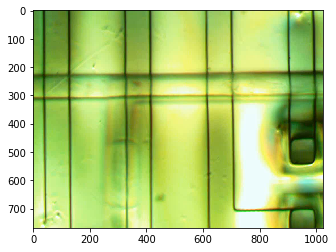

In [4]:
fig, ax = plt.subplots()
ax.imshow(np_img, interpolation=None, vmin=0, vmax=255);

### PIL image

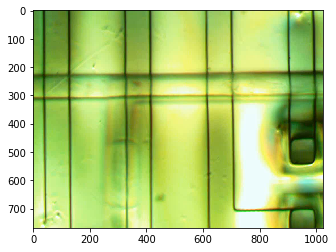

In [5]:
fig, ax = plt.subplots()
ax.imshow(pil_img);

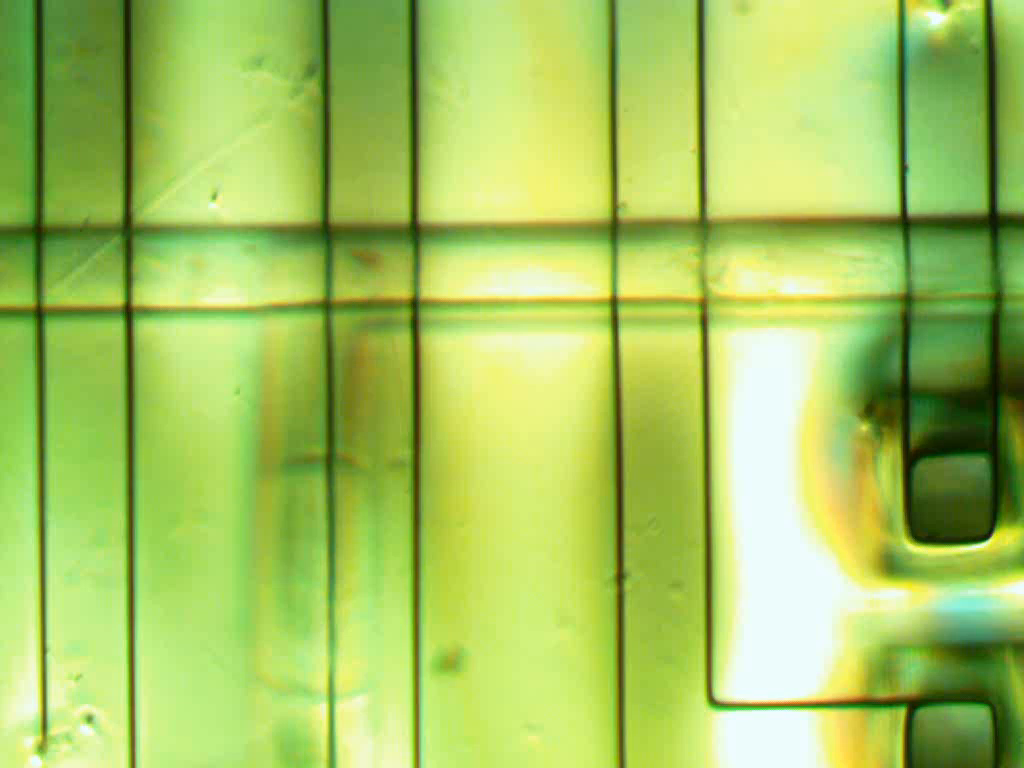

In [6]:
pil_img

# Draw border with slice object

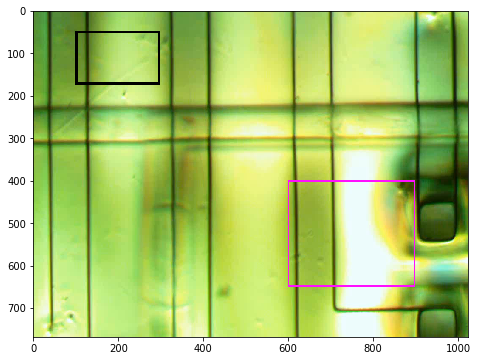

In [24]:
def roi_border(img, roi, border_value=0, border_width=1):
    """
    Draw border on image showing extent of region-of-interest.
    
    Parameters
    ----------
    img : 2D numpy array for grayscale images or 3D [:,:,3] numpy 
          array for color images
        image on which to draw border
    roi : tuple with two numpy slice objects
        region-of-interest that defines border
    border_value : int, float, or 3-element array-like, optional
        color (gray level) for border
    border_width: int, optional
        width of border, drawn on boundary with width toward *interior*
        of region-of-interest
    """
    xslice, yslice = roi[1], roi[0]
    xstart, xstop = xslice.start, xslice.stop
    ystart, ystop = yslice.start, yslice.stop
    img[ystart:ystart+border_width, xstart:xstop] = border_value
    img[ystop-border_width:ystop, xstart:xstop] = border_value
    img[ystart:ystop, xstart:xstart+border_width] = border_value
    img[ystart:ystop, xstop-border_width:xstop] = border_value
    
x1, y1 = 100, 50
w1, h1 = 200, 125
roi_1 = np.s_[y1:y1+h1, x1:x1+w1]
x2, y2 = 600, 400
w2, h2 = 300, 250
roi_2 = np.s_[y2:y2+h2, x2:x2+w2]

temp_np_img = np_img.copy()
roi_border(temp_np_img, roi_1, border_width=5)
roi_border(temp_np_img, roi_2, border_value=(255, 15, 255), border_width=3)

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(temp_np_img, interpolation=None, vmin=0, vmax=255);